<a href="https://colab.research.google.com/github/vedantpople4/LLM/blob/main/Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Training set size: ", len(x_train))
print("Testing set size: ", len(x_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set size:  60000
Testing set size:  10000


In [21]:
#plt.imshow(x_train[5], cmap='Greys')
#print("The label is: ", y_train[5])

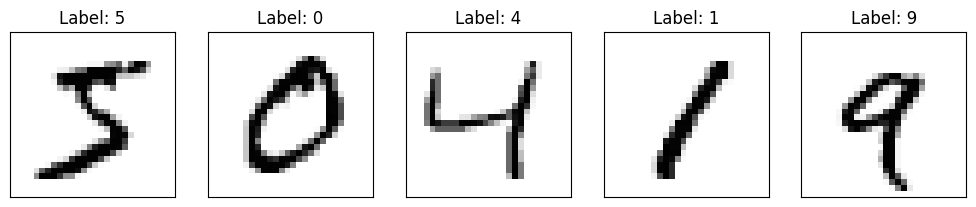

In [8]:
fig = plt.figure(figsize=(20, 20))
for i in range(5):
  ax = fig.add_subplot(1, 8, i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i], cmap='Greys')
  ax.set_title('Label: '+str(y_train[i]))

In [9]:
x_train_reshaped = x_train.reshape(-1, 28*28)
x_test_reshaped = x_test.reshape(-1, 28*28)

In [10]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [14]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(28*28,)))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(x_train_reshaped, y_train_cat, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.6327 - loss: 3.9362
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.8729 - loss: 0.4855
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9064 - loss: 0.3713
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9168 - loss: 0.3471
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9256 - loss: 0.3171
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9263 - loss: 0.3137
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9352 - loss: 0.2858
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9284 - loss: 0.3049
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9324 - loss: 0.3148
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.9365 - loss: 0.2856


In [16]:
predictions = model.predict(x_test_reshaped)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
predictions = [np.argmax(pred) for pred in predictions]

In [18]:
num = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    num += 1

In [20]:
print("The accuracy is", (num/len(y_test))*100)

The accuracy is 96.2
